<a href="https://colab.research.google.com/github/swetha2348568/ML_assignments/blob/main/2348568_lab1_aml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Program_1_Dataset.csv')
df.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crime_Rate        506 non-null    float64
 1   Zone_proportion   506 non-null    float64
 2   Non_Retail_Acres  506 non-null    float64
 3   CHAS              506 non-null    int64  
 4   NOX               506 non-null    float64
 5   Avg_rooms         506 non-null    float64
 6   AGE               506 non-null    float64
 7   Distance          506 non-null    float64
 8   RAD               506 non-null    int64  
 9   Property_TaxRate  506 non-null    int64  
 10  PTRATIO           506 non-null    float64
 11  B                 506 non-null    float64
 12  LSTAT             506 non-null    float64
 13  MValue            506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
df.shape

(506, 14)

In [5]:
df=df.drop(['CHAS','Zone_proportion'],axis=1)

In [6]:
mean_val=df['MValue'].mean()
mean_val

22.532806324110673

In [7]:
# Print the list of column names
print(df.columns)


Index(['Crime_Rate', 'Non_Retail_Acres', 'NOX', 'Avg_rooms ', 'AGE',
       'Distance', 'RAD', 'Property_TaxRate', 'PTRATIO', 'B', 'LSTAT',
       'MValue'],
      dtype='object')


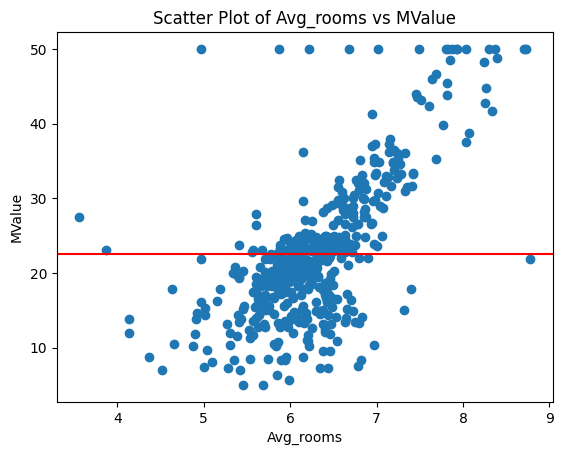

In [8]:
plt.scatter(df['Avg_rooms '], df['MValue'])
plt.axhline(y=mean_val,color='red')
#annotate x and y labels
plt.annotate("Avg. MValue", xy=(1,mean_val+2.5))
plt.title('Scatter Plot of Avg_rooms vs MValue')
plt.xlabel('Avg_rooms')
plt.ylabel('MValue')
plt.show()

In [9]:
X = df['Avg_rooms ']  # Predictor
Y = df['MValue']  # Target variable

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [10]:
df1=pd.concat([X_train,Y_train],axis=1)

In [11]:
print(df1.columns)

Index(['Avg_rooms ', 'MValue'], dtype='object')


In [12]:
min_model1=Y_train.mean()
min_model2=5+10*X_train
min_model3=15+20*X_train
#y=c+mx
print(min_model1)
print(min_model2)
print(min_model3)

22.675706214689264
5      66.67
116    66.82
45     54.03
16     64.28
468    71.57
       ...  
106    63.91
270    71.83
348    65.19
435    67.32
102    66.62
Name: Avg_rooms , Length: 354, dtype: float64
5      138.34
116    138.64
45     113.06
16     133.56
468    148.14
        ...  
106    132.82
270    148.66
348    135.38
435    139.64
102    138.24
Name: Avg_rooms , Length: 354, dtype: float64


In [13]:
df1['Min_model1']=min_model1
df1['Min_model2']=min_model2
df1['Min_model3']=min_model3


Text(0.5, 1.0, 'Model Comparison')

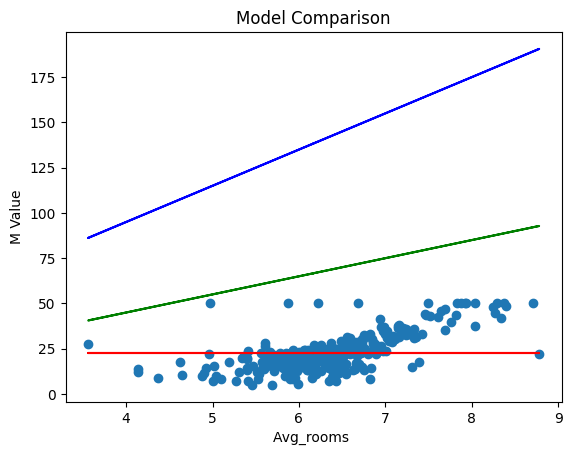

In [14]:
fig, ax=plt.subplots()
ax.scatter(x='Avg_rooms ',y='MValue',data=df1, label='Actual Time Taken')

ax.plot(df1['Avg_rooms '],df1['Min_model1'],color='red', label='Model_1')
ax.plot(df1['Avg_rooms '],df1['Min_model2'],color='green', label='Model_2')
ax.plot(df1['Avg_rooms '],df1['Min_model3'],color='blue', label='Model_3')

ax.set_xlabel('Avg_rooms ')
ax.set_ylabel('M Value')
ax.set_title('Model Comparison')

In [15]:
model1_obs=pd.DataFrame({'avg rooms':df1['Avg_rooms '],
                         'Actual M Value':df1['MValue'],
                         'Predicted Mvalue':df1['Min_model1'],
                         'Error':(df1.Min_model1-df1.MValue)})
model1_obs

,avg rooms,Actual M Value,Predicted Mvalue,Error
5,6.167,20.1,22.675706,2.575706
116,6.182,25.0,22.675706,-2.324294
45,4.903,11.8,22.675706,10.875706
16,5.928,18.3,22.675706,4.375706
468,6.657,17.2,22.675706,5.475706
...,...,...,...,...
106,5.891,22.6,22.675706,0.075706
270,6.683,50.0,22.675706,-27.324294
348,6.019,21.2,22.675706,1.475706
435,6.232,21.2,22.675706,1.475706


In [16]:
model2_obs=pd.DataFrame({'avg rooms':df1['Avg_rooms '],
                         'Actual M Value':df1['MValue'],
                         'Predicted Mvalue':df1['Min_model2'],
                         'Error':(df1.Min_model2-df1.MValue)})
model2_obs

,avg rooms,Actual M Value,Predicted Mvalue,Error
5,6.167,20.1,66.67,46.57
116,6.182,25.0,66.82,41.82
45,4.903,11.8,54.03,42.23
16,5.928,18.3,64.28,45.98
468,6.657,17.2,71.57,54.37
...,...,...,...,...
106,5.891,22.6,63.91,41.31
270,6.683,50.0,71.83,21.83
348,6.019,21.2,65.19,43.99
435,6.232,21.2,67.32,46.12


In [17]:
model3_obs=pd.DataFrame({'avg rooms':df1['Avg_rooms '],
                         'Actual M Value':df1['MValue'],
                         'Predicted Mvalue':df1['Min_model3'],
                         'Error':(df1.Min_model3-df1.MValue)})
model3_obs

,avg rooms,Actual M Value,Predicted Mvalue,Error
5,6.167,20.1,138.34,118.24
116,6.182,25.0,138.64,113.64
45,4.903,11.8,113.06,101.26
16,5.928,18.3,133.56,115.26
468,6.657,17.2,148.14,130.94
...,...,...,...,...
106,5.891,22.6,132.82,110.22
270,6.683,50.0,148.66,98.66
348,6.019,21.2,135.38,114.18
435,6.232,21.2,139.64,118.44


In [18]:
sum(model1_obs['Error']**2)

31445.951073446333

In [19]:
sum(model2_obs['Error']**2)

742586.3226000001

In [20]:
sum(model3_obs['Error']**2)

4986265.2184

In [21]:
x=X_train
y=Y_train

xy=x*y
n=len(df1)

xmean=X_train.mean()
ymean=Y_train.mean()

numerator=xy.sum() - n*xmean*ymean
denom=(x**2).sum() - n*(xmean**2)

m=numerator/denom
c=ymean - (m*xmean)
print('intercept-c:', c, 'Coefficient-m:',m)

intercept-c: -33.51014759751379 Coefficient-m: 8.926202222337855


In [22]:
min_best_fit_model=c+m*df1['Avg_rooms ']
df1['min_best_fit_model']=min_best_fit_model
df1[['Avg_rooms ','MValue','min_best_fit_model']]

,Avg_rooms,MValue,min_best_fit_model
5,6.167,20.1,21.537742
116,6.182,25.0,21.671635
45,4.903,11.8,10.255022
16,5.928,18.3,19.404379
468,6.657,17.2,25.911581
...,...,...,...
106,5.891,22.6,19.074110
270,6.683,50.0,26.143662
348,6.019,21.2,20.216664
435,6.232,21.2,22.117945


Text(0.5, 1.0, 'Best Fit Model Line')

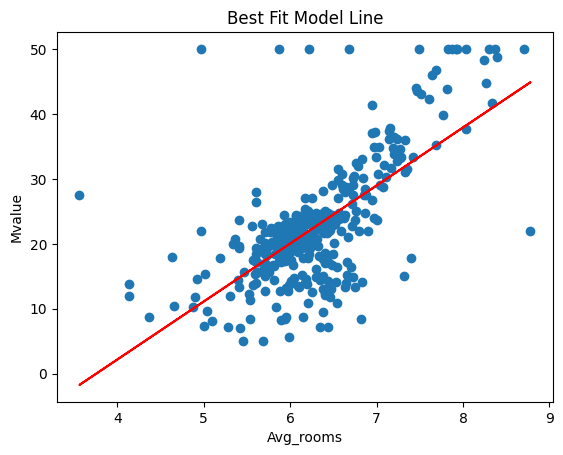

In [23]:
fig, ax=plt.subplots()
ax.scatter(x='Avg_rooms ',y='MValue',data=df1, label='Actual M Value')

ax.plot(df1['Avg_rooms '],df1['min_best_fit_model'],color='red', label='Best Fit Model')
ax.set_xlabel('Avg_rooms')
ax.set_ylabel('Mvalue')
ax.set_title('Best Fit Model Line')

In [47]:
model_best_obs=pd.DataFrame({'avg rooms':df1['Avg_rooms '],
                         'Actual M Value':df1['MValue'],
                         'Predicted Mvalue':df1['min_best_fit_model'],
                         'Error':(df1.MValue-df1.min_best_fit_model)})
model_best_obs

,avg rooms,Actual M Value,Predicted Mvalue,Error
5,6.167,20.1,21.537742,-1.437742
116,6.182,25.0,21.671635,3.328365
45,4.903,11.8,10.255022,1.544978
16,5.928,18.3,19.404379,-1.104379
468,6.657,17.2,25.911581,-8.711581
...,...,...,...,...
106,5.891,22.6,19.074110,3.525890
270,6.683,50.0,26.143662,23.856338
348,6.019,21.2,20.216664,0.983336
435,6.232,21.2,22.117945,-0.917945


In [48]:
sum(model_best_obs['Error']**2)

16925.3437397772

In [24]:
from sklearn.linear_model import LinearRegression

In [37]:
X = df[['Avg_rooms ']]  # Predictor
y = df['MValue']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [34]:
model=LinearRegression()

In [38]:
model.fit(X_train,y_train)

LinearRegression()

In [39]:
print('Intercept:',model.intercept_)
print('Coefficients:',model.coef_)

Intercept: -33.510147597513345
Coefficients: [8.92620222]


In [41]:
SST=sum((df.MValue - df.MValue.mean())**2)
SST

42716.29541501977

In [50]:
SSE=sum(model_best_obs.Error**2)
SSE

16925.3437397772

In [51]:
SSR=SST-SSE
SSR

25790.95167524257

In [52]:
RSQ=SSR/SST
RSQ

0.603773136800951

In [58]:
RSQ1=model.score(X_test,y_test)
RSQ1

0.5424461839891813

In [59]:
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
y_test_pred = model.predict(X_test)

# Evaluate the model on the testing set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Mean Squared Error (Testing): {mse_test}')
print(f'R-squared (Testing): {r2_test}')


Mean Squared Error (Testing): 33.853804802145724
R-squared (Testing): 0.5424461839891813
